In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# !python
# Python 3.10.12

In [ ]:
# # To unzip
# from zipfile import ZipFile
# file_name = "/content/drive/MyDrive/Colab Notebooks/Emotion_Detection/dataset_big.zip"
# with ZipFile(file_name, 'r') as zip:
#   zip.extractall()
#   print('done')

In [1]:
#importing important libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D
from keras.layers import BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#taking inputs images for training
picture_size = 48
folder_path = "dataset/mini_data/"

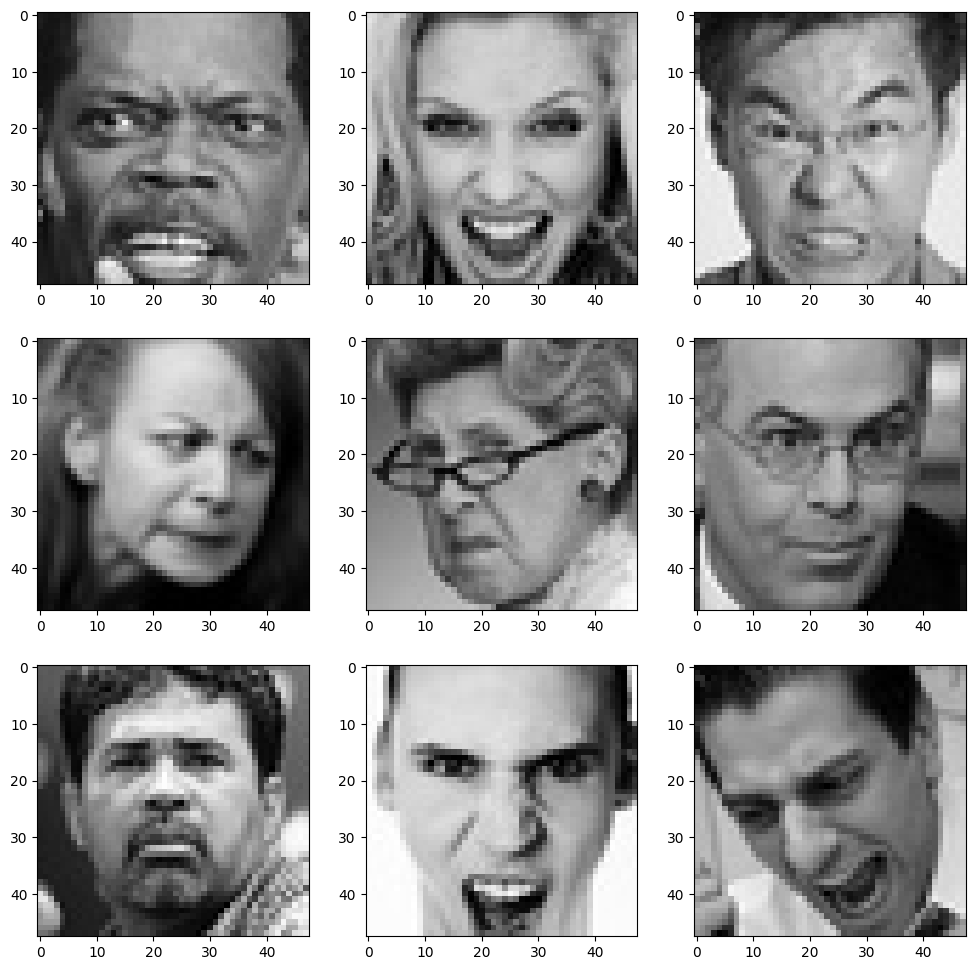

In [3]:
#checking disgust image
expression = '0' #'angry'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

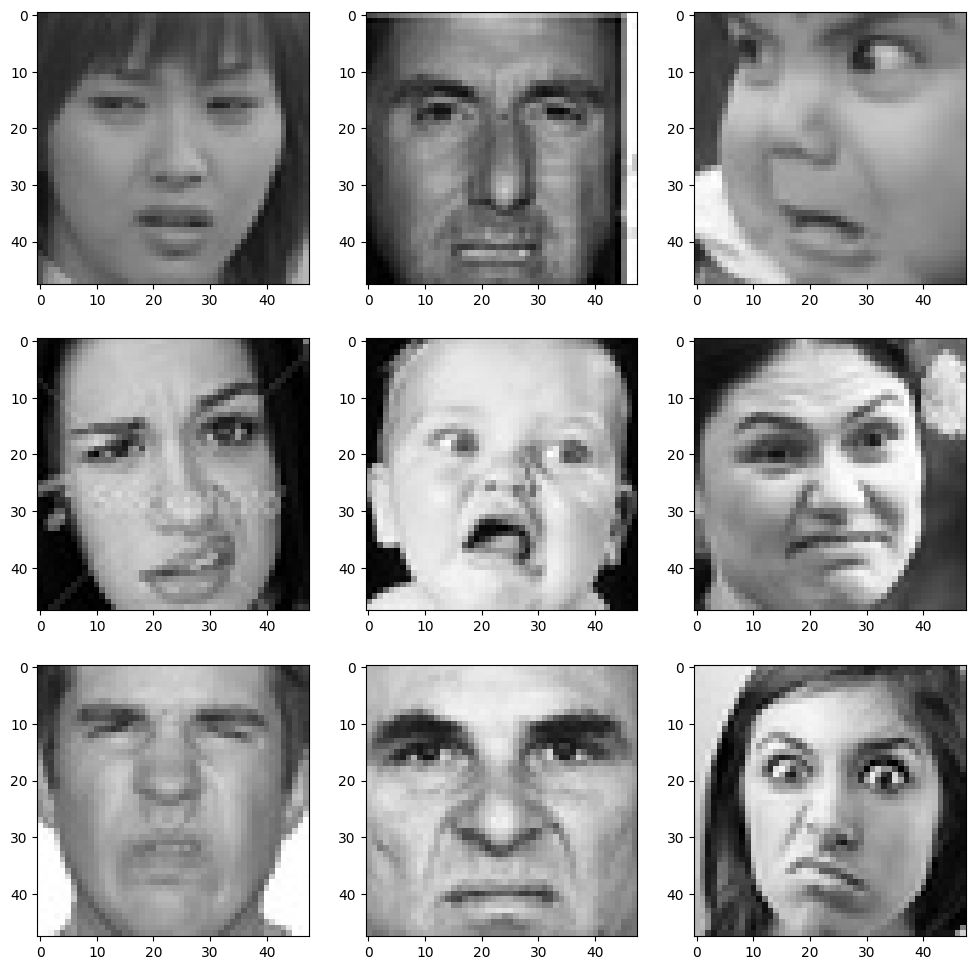

In [4]:
#checking disgust image
expression = '1' # 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

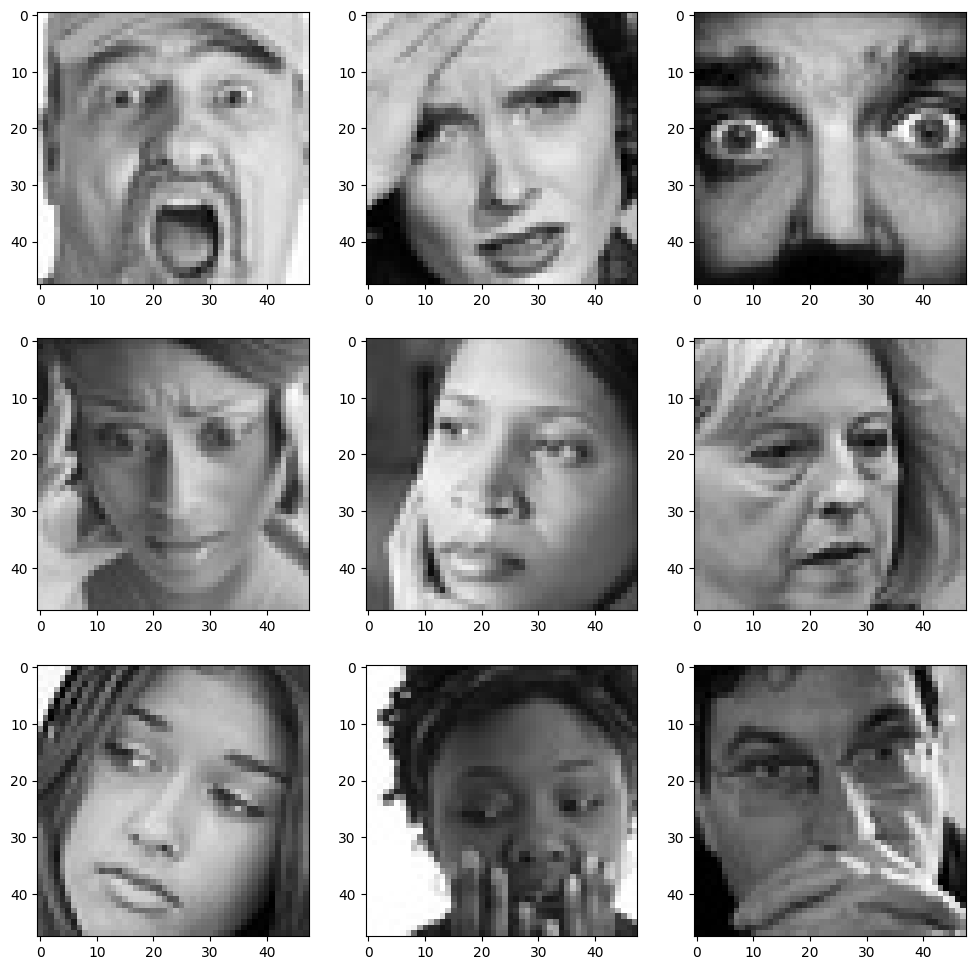

In [5]:
#checking disgust image
expression = '2' # 'fear'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

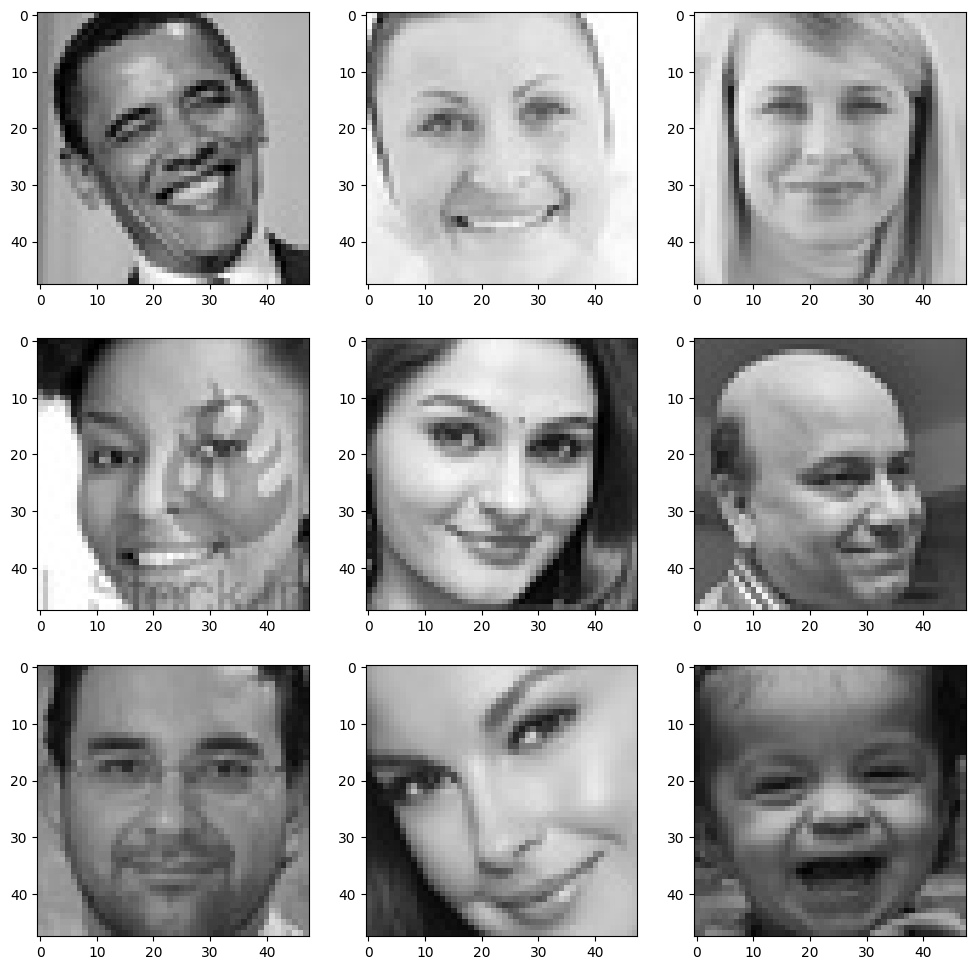

In [6]:
#checking disgust image
expression = '3' # 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

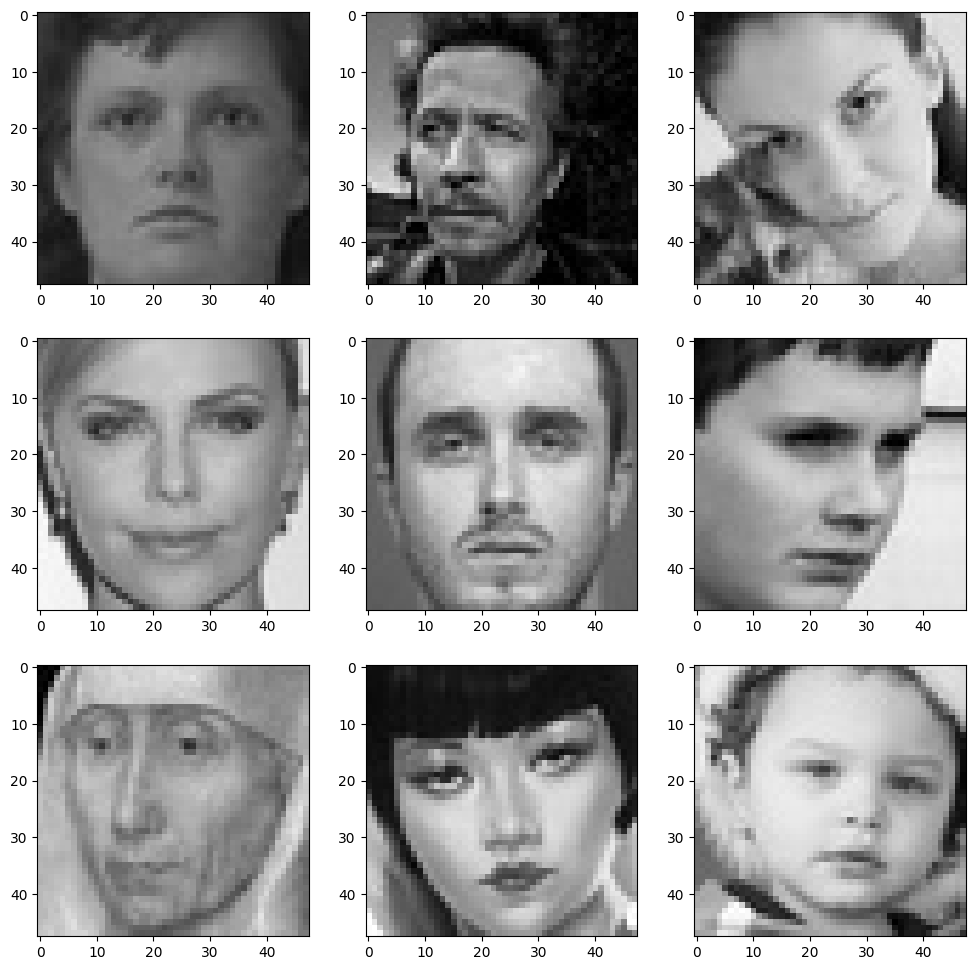

In [7]:
#checking disgust image
expression = '4' # 'neutral'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

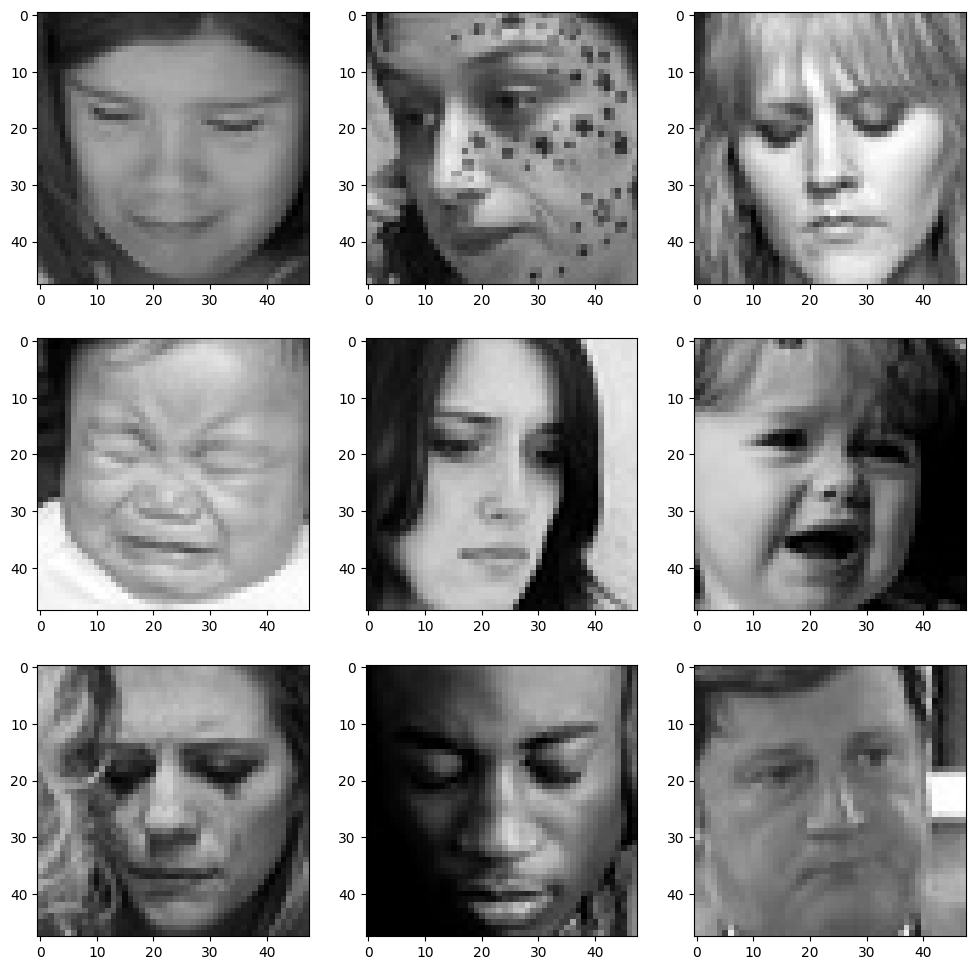

In [8]:
#checking disgust image
expression = '5' # 'sad'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

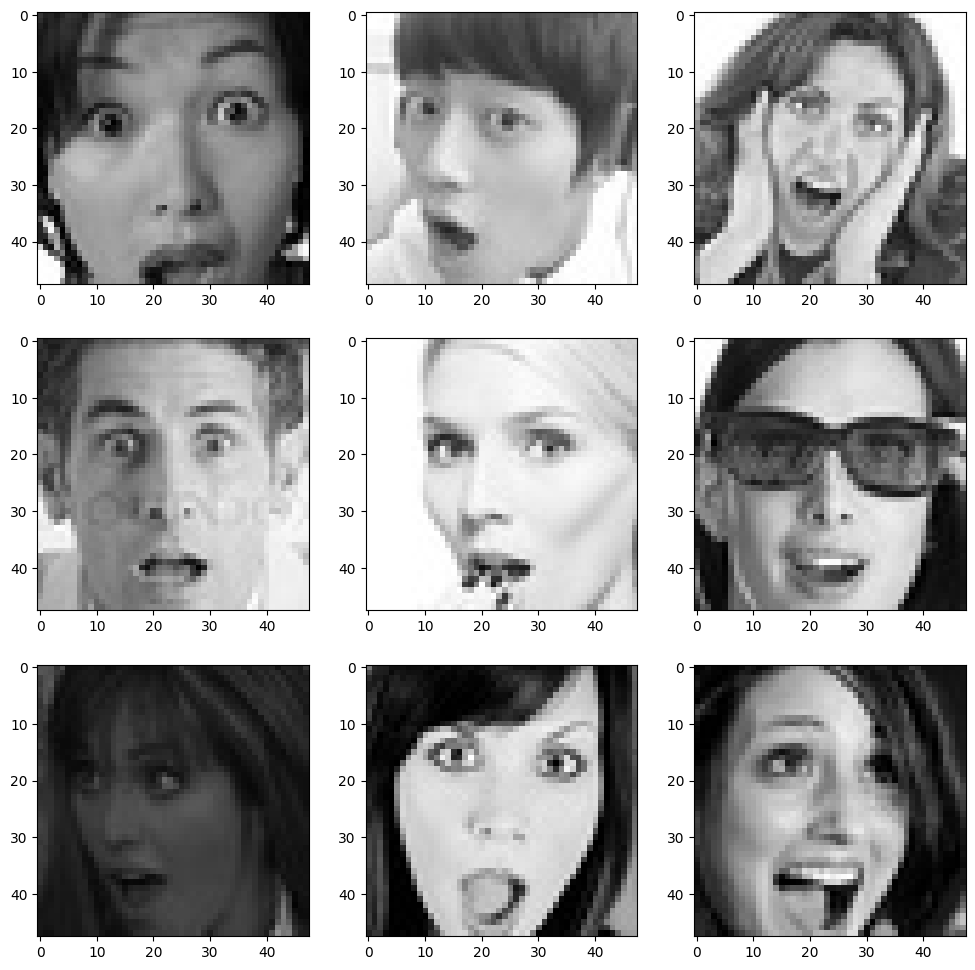

In [9]:
#checking disgust image
expression = '6' # 'surprise'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

In [10]:
#splitting data into train, test and validation set
batch_size  = 64 # 128

datagen_train  = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.1,
                                    zoom_range = 0.05,
                                    horizontal_flip = True,
                                    validation_split=0.2)

datagen_val = ImageDataGenerator(rescale = 1./255)

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

test_set = datagen_val.flow_from_directory(folder_path+"val",
                                           target_size = (picture_size, picture_size),
                                           color_mode = "grayscale",
                                           batch_size = batch_size,
                                           class_mode = 'categorical',
                                           shuffle = False)

Found 925 images belonging to 7 classes.
Found 402 images belonging to 7 classes.


In [11]:
#building model with 7 classes

no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



# model 2

# model = Sequential()
# model.add(Conv2D(filters = 128, kernel_size = (3, 3), input_shape = (48,48,1), activation = "relu"))
# model.add(MaxPooling2D(pool_size = (3, 3)))
# model.add(Conv2D(filters = 128, kernel_size = (5, 5), activation = "relu"))
# model.add(MaxPooling2D(pool_size = (3, 3)))
# model.add(Flatten())
# model.add(Dense(units=1024, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=512, activation='relu'))
# model.add(Dense(units=256, activation='relu'))
# model.add(Dense(units=no_of_classes, activation='softmax'))

# opt = Adam(lr = 0.0001)
# model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       409728    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 1024)            

In [12]:
# !pip install pydot graphviz

# from tensorflow.keras.utils import plot_model
# plot_model(model, to_file='model.png')

In [13]:

# checkpoint = ModelCheckpoint("model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# #Stopping training when a monitored metric has stopped improving.
# # early_stopping = EarlyStopping(monitor='val_loss',
# #                           min_delta=0,
# #                           patience=3,
# #                           verbose=1,
# #                           restore_best_weights=True
# #                           )

# # reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
# #                               factor=0.2,
# #                               patience=3,
# #                               verbose=1,
# #                               min_delta=0.0001)

# callbacks_list = [checkpoint] # ,reduce_learningrate,early_stopping,

# epochs = 50

# model.compile(loss='categorical_crossentropy',
#               optimizer = 'adam',# Adam(lr=0.001),
#               metrics=['accuracy'])


# Checkpoint's
# https://keras.io/api/callbacks/model_checkpoint/

filepath="test_models/model_{epoch:02d}_{val_accuracy:.3f}_{val_loss:.3f}.h5"
checkpoint = ModelCheckpoint(filepath,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')
callbacks_list = [checkpoint]


In [15]:
#fitting model with 48 epoch
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=100,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/100
14/14 [==============================] - ETA: 0s - loss: 1.9420 - accuracy: 0.1417
Epoch 1: val_loss improved from inf to 1.93487, saving model to test_models\model_01_0.159_1.935.h5
14/14 [==============================] - 4s 299ms/step - loss: 1.9420 - accuracy: 0.1417 - val_loss: 1.9349 - val_accuracy: 0.1589
Epoch 2/100
14/14 [==============================] - ETA: 0s - loss: 1.9375 - accuracy: 0.1382
Epoch 2: val_loss improved from 1.93487 to 1.92622, saving model to test_models\model_02_0.159_1.926.h5
14/14 [==============================] - 4s 299ms/step - loss: 1.9375 - accuracy: 0.1382 - val_loss: 1.9262 - val_accuracy: 0.1589
Epoch 3/100
14/14 [==============================] - ETA: 0s - loss: 1.9262 - accuracy: 0.1823
Epoch 3: val_loss improved from 1.92622 to 1.92204, saving model to test_models\model_03_0.190_1.922.h5
14/14 [==============================] - 7s 482ms/step - loss: 1.9262 - accuracy: 0.1823 - val_loss: 1.9220 - val_accuracy: 0.1901
Epoch 4/100
14

Epoch 28/100
14/14 [==============================] - ETA: 0s - loss: 0.9840 - accuracy: 0.6307
Epoch 28: val_loss did not improve from 1.52530
14/14 [==============================] - 5s 323ms/step - loss: 0.9840 - accuracy: 0.6307 - val_loss: 1.5320 - val_accuracy: 0.4870
Epoch 29/100
14/14 [==============================] - ETA: 0s - loss: 0.9678 - accuracy: 0.6527
Epoch 29: val_loss did not improve from 1.52530
14/14 [==============================] - 4s 308ms/step - loss: 0.9678 - accuracy: 0.6527 - val_loss: 1.6408 - val_accuracy: 0.4635
Epoch 30/100
14/14 [==============================] - ETA: 0s - loss: 0.9028 - accuracy: 0.6655
Epoch 30: val_loss improved from 1.52530 to 1.52054, saving model to test_models\model_30_0.508_1.521.h5
14/14 [==============================] - 4s 305ms/step - loss: 0.9028 - accuracy: 0.6655 - val_loss: 1.5205 - val_accuracy: 0.5078
Epoch 31/100
14/14 [==============================] - ETA: 0s - loss: 0.8580 - accuracy: 0.6911
Epoch 31: val_loss did

14/14 [==============================] - 5s 336ms/step - loss: 0.2704 - accuracy: 0.9059 - val_loss: 2.1499 - val_accuracy: 0.5651
Epoch 58/100
14/14 [==============================] - ETA: 0s - loss: 0.2725 - accuracy: 0.9059
Epoch 58: val_loss did not improve from 1.50638
14/14 [==============================] - 5s 335ms/step - loss: 0.2725 - accuracy: 0.9059 - val_loss: 2.3724 - val_accuracy: 0.5443
Epoch 59/100
14/14 [==============================] - ETA: 0s - loss: 0.2600 - accuracy: 0.9129
Epoch 59: val_loss did not improve from 1.50638
14/14 [==============================] - 7s 481ms/step - loss: 0.2600 - accuracy: 0.9129 - val_loss: 2.4388 - val_accuracy: 0.5286
Epoch 60/100
14/14 [==============================] - ETA: 0s - loss: 0.2247 - accuracy: 0.9222
Epoch 60: val_loss did not improve from 1.50638
14/14 [==============================] - 4s 306ms/step - loss: 0.2247 - accuracy: 0.9222 - val_loss: 2.5792 - val_accuracy: 0.5260
Epoch 61/100
14/14 [========================

14/14 [==============================] - ETA: 0s - loss: 0.0674 - accuracy: 0.9756
Epoch 87: val_loss did not improve from 1.50638
14/14 [==============================] - 5s 330ms/step - loss: 0.0674 - accuracy: 0.9756 - val_loss: 3.0652 - val_accuracy: 0.5625
Epoch 88/100
14/14 [==============================] - ETA: 0s - loss: 0.1318 - accuracy: 0.9663
Epoch 88: val_loss did not improve from 1.50638
14/14 [==============================] - 5s 350ms/step - loss: 0.1318 - accuracy: 0.9663 - val_loss: 2.9850 - val_accuracy: 0.5833
Epoch 89/100
14/14 [==============================] - ETA: 0s - loss: 0.1105 - accuracy: 0.9640
Epoch 89: val_loss did not improve from 1.50638
14/14 [==============================] - 5s 373ms/step - loss: 0.1105 - accuracy: 0.9640 - val_loss: 2.7820 - val_accuracy: 0.6016
Epoch 90/100
14/14 [==============================] - ETA: 0s - loss: 0.1140 - accuracy: 0.9582
Epoch 90: val_loss did not improve from 1.50638
14/14 [==============================] - 5s 

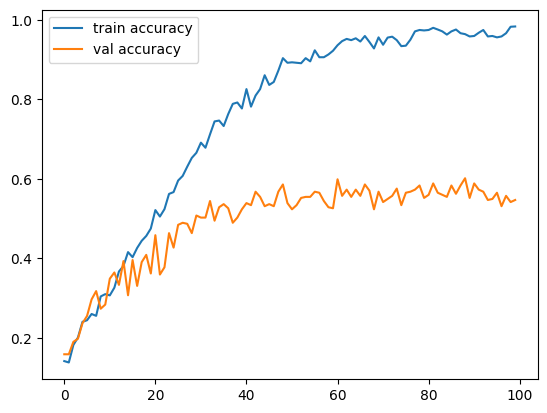

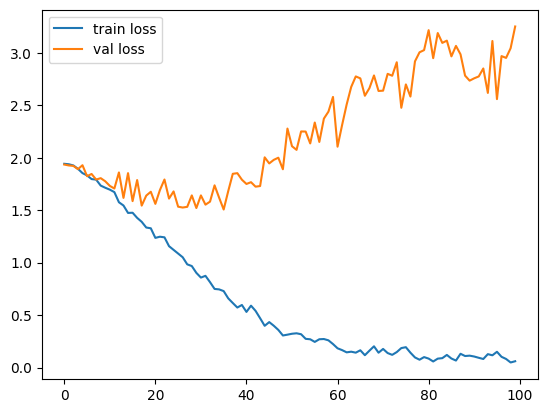

In [16]:
# accuracies
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.savefig('accuracy_and_val_accuracy.png', dpi=200)
plt.show()

# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('loss_and_val_loss.png', dpi=200)
plt.show()


In [17]:
from keras.models import load_model
from glob import glob
import os

model = load_model('test_models/model_36_0.536_1.506.h5') # /content/model_18_0.636_0.994.h5 # '/content/model_17_0.559_1.183.h5'
model.summary()

data = []
labels = []
classes = glob('dataset/data_cp/*') # data/train/* # data/test/*
print('Number of classes : ', classes)
cur_path = os.getcwd()
print('cur_path : ', cur_path)


from PIL import Image

# Retrieving the images and their labels
for i in classes: # range(len(classes)):
    # path = os.path.join(cur_path,'images/images/validation',str(i))
    path = os.path.join(str(i))
    print('path : ',path)
    images = os.listdir(path)
    # print('images : ',images)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((48,48))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
print('loaded ...')


y_true = []
y_pred = []

for i in range(len(data)):
    x = data[i]
    x = np.expand_dims(x, axis=0)
    img_data = x # preprocess_input(x)
    classes = model.predict(img_data)
    li = list(classes[0])
    y_pred.append(li.index(max(li)))
    y_true.append(int(labels[i][-1]))

    print('y_true : ', y_true[i], ' y_pred : ', y_pred[i])

print('done...')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       409728    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 1024)              1

1/1 [==============================] - 0s 28ms/step
y_true :  0  y_pred :  3
1/1 [==============================] - 0s 25ms/step
y_true :  0  y_pred :  0
1/1 [==============================] - 0s 19ms/step
y_true :  0  y_pred :  0
1/1 [==============================] - 0s 35ms/step
y_true :  0  y_pred :  6
1/1 [==============================] - 0s 34ms/step
y_true :  0  y_pred :  0
1/1 [==============================] - 0s 38ms/step
y_true :  0  y_pred :  6
1/1 [==============================] - 0s 51ms/step
y_true :  0  y_pred :  0
1/1 [==============================] - 0s 32ms/step
y_true :  0  y_pred :  2
1/1 [==============================] - 0s 21ms/step
y_true :  0  y_pred :  1
1/1 [==============================] - 0s 27ms/step
y_true :  0  y_pred :  0
1/1 [==============================] - 0s 32ms/step
y_true :  0  y_pred :  0
1/1 [==============================] - 0s 32ms/step
y_true :  0  y_pred :  2
1/1 [==============================] - 0s 33ms/step
y_true :  0  y_pred :  2

1/1 [==============================] - 0s 19ms/step
y_true :  0  y_pred :  6
1/1 [==============================] - 0s 28ms/step
y_true :  0  y_pred :  0
1/1 [==============================] - 0s 21ms/step
y_true :  0  y_pred :  0
1/1 [==============================] - 0s 34ms/step
y_true :  0  y_pred :  4
1/1 [==============================] - 0s 48ms/step
y_true :  0  y_pred :  1
1/1 [==============================] - 0s 32ms/step
y_true :  0  y_pred :  0
1/1 [==============================] - 0s 29ms/step
y_true :  0  y_pred :  1
1/1 [==============================] - 0s 22ms/step
y_true :  0  y_pred :  0
1/1 [==============================] - 0s 33ms/step
y_true :  0  y_pred :  1
1/1 [==============================] - 0s 33ms/step
y_true :  0  y_pred :  0
1/1 [==============================] - 0s 34ms/step
y_true :  0  y_pred :  5
1/1 [==============================] - 0s 16ms/step
y_true :  0  y_pred :  0
1/1 [==============================] - 0s 18ms/step
y_true :  0  y_pred :  0

1/1 [==============================] - 0s 22ms/step
y_true :  1  y_pred :  6
1/1 [==============================] - 0s 27ms/step
y_true :  1  y_pred :  3
1/1 [==============================] - 0s 26ms/step
y_true :  1  y_pred :  1
1/1 [==============================] - 0s 26ms/step
y_true :  1  y_pred :  1
1/1 [==============================] - 0s 18ms/step
y_true :  1  y_pred :  1
1/1 [==============================] - 0s 27ms/step
y_true :  1  y_pred :  5
1/1 [==============================] - 0s 25ms/step
y_true :  1  y_pred :  1
1/1 [==============================] - 0s 23ms/step
y_true :  1  y_pred :  1
1/1 [==============================] - 0s 17ms/step
y_true :  1  y_pred :  1
1/1 [==============================] - 0s 28ms/step
y_true :  1  y_pred :  1
1/1 [==============================] - 0s 33ms/step
y_true :  1  y_pred :  6
1/1 [==============================] - 0s 31ms/step
y_true :  1  y_pred :  0
1/1 [==============================] - 0s 44ms/step
y_true :  1  y_pred :  1

1/1 [==============================] - 0s 28ms/step
y_true :  2  y_pred :  2
1/1 [==============================] - 0s 26ms/step
y_true :  2  y_pred :  2
1/1 [==============================] - 0s 30ms/step
y_true :  2  y_pred :  2
1/1 [==============================] - 0s 20ms/step
y_true :  2  y_pred :  2
1/1 [==============================] - 0s 28ms/step
y_true :  2  y_pred :  2
1/1 [==============================] - 0s 26ms/step
y_true :  2  y_pred :  2
1/1 [==============================] - 0s 20ms/step
y_true :  2  y_pred :  6
1/1 [==============================] - 0s 13ms/step
y_true :  2  y_pred :  0
1/1 [==============================] - 0s 38ms/step
y_true :  2  y_pred :  0
1/1 [==============================] - 0s 23ms/step
y_true :  2  y_pred :  3
1/1 [==============================] - 0s 14ms/step
y_true :  2  y_pred :  6
1/1 [==============================] - 0s 26ms/step
y_true :  2  y_pred :  2
1/1 [==============================] - 0s 24ms/step
y_true :  2  y_pred :  2

1/1 [==============================] - 0s 26ms/step
y_true :  2  y_pred :  2
1/1 [==============================] - 0s 15ms/step
y_true :  2  y_pred :  0
1/1 [==============================] - 0s 42ms/step
y_true :  2  y_pred :  2
1/1 [==============================] - 0s 42ms/step
y_true :  2  y_pred :  2
1/1 [==============================] - 0s 26ms/step
y_true :  2  y_pred :  2
1/1 [==============================] - 0s 10ms/step
y_true :  2  y_pred :  6
1/1 [==============================] - 0s 28ms/step
y_true :  2  y_pred :  6
1/1 [==============================] - 0s 43ms/step
y_true :  2  y_pred :  2
1/1 [==============================] - 0s 47ms/step
y_true :  2  y_pred :  3
1/1 [==============================] - 0s 34ms/step
y_true :  2  y_pred :  4
1/1 [==============================] - 0s 13ms/step
y_true :  2  y_pred :  6
1/1 [==============================] - 0s 39ms/step
y_true :  2  y_pred :  2
1/1 [==============================] - 0s 48ms/step
y_true :  2  y_pred :  6

1/1 [==============================] - 0s 32ms/step
y_true :  3  y_pred :  6
1/1 [==============================] - 0s 28ms/step
y_true :  3  y_pred :  0
1/1 [==============================] - 0s 30ms/step
y_true :  3  y_pred :  3
1/1 [==============================] - 0s 31ms/step
y_true :  3  y_pred :  4
1/1 [==============================] - 0s 33ms/step
y_true :  3  y_pred :  3
1/1 [==============================] - 0s 32ms/step
y_true :  3  y_pred :  3
1/1 [==============================] - 0s 14ms/step
y_true :  3  y_pred :  3
1/1 [==============================] - 0s 27ms/step
y_true :  3  y_pred :  0
1/1 [==============================] - 0s 17ms/step
y_true :  3  y_pred :  0
1/1 [==============================] - 0s 26ms/step
y_true :  3  y_pred :  6
1/1 [==============================] - 0s 27ms/step
y_true :  3  y_pred :  3
1/1 [==============================] - 0s 28ms/step
y_true :  3  y_pred :  3
1/1 [==============================] - 0s 27ms/step
y_true :  3  y_pred :  1

1/1 [==============================] - 0s 46ms/step
y_true :  3  y_pred :  3
1/1 [==============================] - 0s 32ms/step
y_true :  3  y_pred :  6
1/1 [==============================] - 0s 28ms/step
y_true :  3  y_pred :  3
1/1 [==============================] - 0s 29ms/step
y_true :  3  y_pred :  3
1/1 [==============================] - 0s 30ms/step
y_true :  3  y_pred :  3
1/1 [==============================] - 0s 26ms/step
y_true :  3  y_pred :  3
1/1 [==============================] - 0s 33ms/step
y_true :  3  y_pred :  3
1/1 [==============================] - 0s 49ms/step
y_true :  3  y_pred :  3
1/1 [==============================] - 0s 43ms/step
y_true :  3  y_pred :  3
1/1 [==============================] - 0s 42ms/step
y_true :  3  y_pred :  0
1/1 [==============================] - 0s 35ms/step
y_true :  3  y_pred :  3
1/1 [==============================] - 0s 44ms/step
y_true :  3  y_pred :  3
1/1 [==============================] - 0s 86ms/step
y_true :  3  y_pred :  6

1/1 [==============================] - 0s 34ms/step
y_true :  4  y_pred :  4
1/1 [==============================] - 0s 22ms/step
y_true :  4  y_pred :  0
1/1 [==============================] - 0s 28ms/step
y_true :  4  y_pred :  4
1/1 [==============================] - 0s 32ms/step
y_true :  4  y_pred :  4
1/1 [==============================] - 0s 29ms/step
y_true :  4  y_pred :  4
1/1 [==============================] - 0s 26ms/step
y_true :  4  y_pred :  4
1/1 [==============================] - 0s 14ms/step
y_true :  4  y_pred :  6
1/1 [==============================] - 0s 25ms/step
y_true :  4  y_pred :  4
1/1 [==============================] - 0s 26ms/step
y_true :  4  y_pred :  4
1/1 [==============================] - 0s 18ms/step
y_true :  4  y_pred :  4
1/1 [==============================] - 0s 27ms/step
y_true :  4  y_pred :  6
1/1 [==============================] - 0s 28ms/step
y_true :  4  y_pred :  4
1/1 [==============================] - 0s 28ms/step
y_true :  4  y_pred :  4

1/1 [==============================] - 0s 32ms/step
y_true :  4  y_pred :  4
1/1 [==============================] - 0s 27ms/step
y_true :  4  y_pred :  6
1/1 [==============================] - 0s 25ms/step
y_true :  5  y_pred :  5
1/1 [==============================] - 0s 23ms/step
y_true :  5  y_pred :  1
1/1 [==============================] - 0s 33ms/step
y_true :  5  y_pred :  4
1/1 [==============================] - 0s 34ms/step
y_true :  5  y_pred :  5
1/1 [==============================] - 0s 28ms/step
y_true :  5  y_pred :  5
1/1 [==============================] - 0s 65ms/step
y_true :  5  y_pred :  6
1/1 [==============================] - 0s 44ms/step
y_true :  5  y_pred :  3
1/1 [==============================] - 0s 43ms/step
y_true :  5  y_pred :  4
1/1 [==============================] - 0s 20ms/step
y_true :  5  y_pred :  4
1/1 [==============================] - 0s 9ms/step
y_true :  5  y_pred :  5
1/1 [==============================] - 0s 25ms/step
y_true :  5  y_pred :  1


1/1 [==============================] - 0s 39ms/step
y_true :  5  y_pred :  5
1/1 [==============================] - 0s 46ms/step
y_true :  5  y_pred :  5
1/1 [==============================] - 0s 51ms/step
y_true :  5  y_pred :  5
1/1 [==============================] - 0s 45ms/step
y_true :  5  y_pred :  2
1/1 [==============================] - 0s 25ms/step
y_true :  5  y_pred :  4
1/1 [==============================] - 0s 29ms/step
y_true :  5  y_pred :  2
1/1 [==============================] - 0s 28ms/step
y_true :  5  y_pred :  0
1/1 [==============================] - 0s 30ms/step
y_true :  5  y_pred :  0
1/1 [==============================] - 0s 30ms/step
y_true :  5  y_pred :  5
1/1 [==============================] - 0s 32ms/step
y_true :  5  y_pred :  5
1/1 [==============================] - 0s 39ms/step
y_true :  5  y_pred :  1
1/1 [==============================] - 0s 32ms/step
y_true :  5  y_pred :  4
1/1 [==============================] - 0s 37ms/step
y_true :  5  y_pred :  5

1/1 [==============================] - 0s 26ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 29ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 26ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 19ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 28ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 22ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 20ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 27ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 25ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 18ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 13ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 26ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 24ms/step
y_true :  6  y_pred :  6

1/1 [==============================] - 0s 25ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 24ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 25ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 17ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 14ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 26ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 26ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 15ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 25ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 25ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 15ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 25ms/step
y_true :  6  y_pred :  6
1/1 [==============================] - 0s 25ms/step
y_true :  6  y_pred :  6

In [19]:
# from keras.utils.vis_utils import plot_model
# https://stackoverflow.com/questions/43511819/importerror-no-module-named-keras-utils-visualize-util
# from keras.utils import plot_model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

[[116  22  46  12   8   9   9]
 [  2  80   5   1   2   2   8]
 [ 22  10  76  14   5   5  69]
 [ 23  10  23 113   9   2  21]
 [ 10   7   6   6 127   9  36]
 [ 13  19  22   4  21 110  12]
 [  0   3   7   0   1   0 190]] 

Accuracy: 0.611907 

Error rate: 0.388093 

classification_report 

               precision    recall  f1-score   support

           0       0.62      0.52      0.57       222
           1       0.53      0.80      0.64       100
           2       0.41      0.38      0.39       201
           3       0.75      0.56      0.64       201
           4       0.73      0.63      0.68       201
           5       0.80      0.55      0.65       201
           6       0.55      0.95      0.70       201

    accuracy                           0.61      1327
   macro avg       0.63      0.63      0.61      1327
weighted avg       0.64      0.61      0.61      1327
 

Cohens kappa: 0.546075


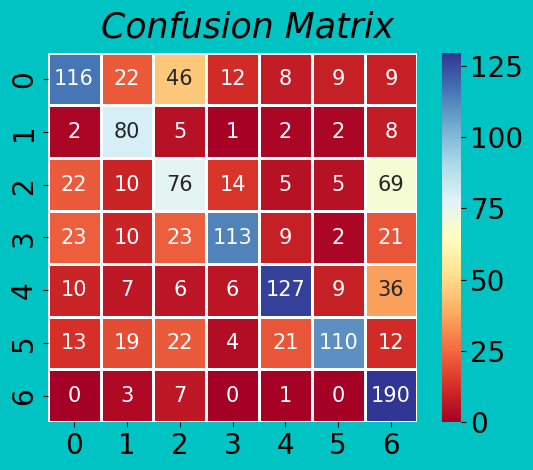

In [20]:
  # confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true,y_pred)
print(matrix, '\n')

# accuracy: (tp + tn) / (p + n)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy: %f' % accuracy, '\n')
print('Error rate: %f' % (1-accuracy), '\n')

from sklearn.metrics import classification_report
print("classification_report \n\n", classification_report(y_true,y_pred), '\n')

# kappa
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_true,y_pred)
print('Cohens kappa: %f' % kappa)

# Commented out IPython magic to ensure Python compatibility.
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns

plt.rcParams['font.size'] = 20
bg_color = (0,0.77,0.77)
plt.rcParams['figure.facecolor'] = bg_color
plt.rcParams['axes.facecolor'] = bg_color

fig, ax = plt.subplots(1)

plt.text(1,-.3, "Confusion Matrix", fontsize = 25, color='Black', fontstyle='italic')

ax = sns.heatmap(matrix, annot=True, annot_kws={'size':15}, fmt="d",
                 robust=True, linewidths=.9, cmap="RdYlBu", square=True)
# vmin=0, vmax=350,
plt.savefig("model_CM2.jpeg", dpi=200, facecolor=bg_color, transparent=True)
plt.show()


In [ ]:
y_true,y_pred